<table>
    <tr>
        <td><img src="../imagenes/urosario.jpeg" width="400"/></td>
        <td>&nbsp;</td>
        <td>
            <h1 style="color:blue;text-align:left">Aprendizaje supervisado</h1>
        </td>
        <td>
            <table>
                <tr>
                    <td><p style="font-size:150%;text-align:center">Notebook</p></td>
                    <td><p style="font-size:150%;text-align:center">Regresion Lineal Multilineal</p></td>
                </tr>
            </table>
        </td>
    </tr>
</table>


La regresión lineal múltiple extiende la regresión lineal simple para incluir más de una variable explicativa. En ambos casos, todavía usamos el término ``lineal'' porque asumimos que la variable de respuesta está directamente relacionada con una combinación lineal de las variables explicativas. La ecuación para la regresión lineal múltiple tiene la misma forma que la de la regresión lineal simple pero tiene más términos:
\begin{equation}
y_i = \beta_0 + \beta_1x_{1i} + \beta_2x_{2i} + \cdots + \beta_px_{pi} + e_i
\end{equation}


$y_i$ es la variable dependiente o la variable que se desea predecir o explicar para la $i$-ésima observación.

$\beta_0$ es el término de intercepción o constante, representando el valor esperado de $y_i$ cuando todas las variables independientes son cero.

$\beta_1, \beta_2, \ldots, \beta_p$ son los coeficientes de las variables independientes, indicando el cambio esperado en $y_i$ por una unidad de cambio en la variable independiente correspondiente, manteniendo las otras variables constantes.

$x_{1i}, x_{2i}, \ldots, x_{pi}$ son las variables independientes o explicativas, usadas para predecir o explicar los valores de la variable dependiente.

$e_i$ es el término de error para la $i$-ésima observación, representando la diferencia entre el valor observado de lavariable dependiente y el valor predicho por el modelo.



In [4]:
import pandas as pd
df = pd.read_csv("data.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Car     36 non-null     object
 1   Model   36 non-null     object
 2   Volume  36 non-null     int64 
 3   Weight  36 non-null     int64 
 4   CO2     36 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.5+ KB


In [7]:
df.head()

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


## Ejemplo 1
como se puede observar contamos con un dataset pequeño, el cual nos da información sobre las emiciones de CO2 dependiendo de algunas carácteristicas de vehículos, como marca, modelo, peso y volumen. Para este caso tomaremos solo las variables de volumen y peso para hacer la regresión.

In [6]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

X = df[['Weight', 'Volume']]
y = df['CO2']

regr = linear_model.LinearRegression()
regr.fit(X, y)

# Predicción con el modelo entrenado
y_pred = regr.predict(X)

# Cálculo de métricas
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)
rmse = np.sqrt(mse)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R^2: {r2}")
print(f"RMSE: {rmse}")

MSE: 33.68279098995156
MAE: 5.075498597144509
R^2: 0.37655640436199855
RMSE: 5.803687706101317


#### Métricas
Mean Absolute Error (MAE)
El MAE mide el promedio de los errores absolutos, es decir, la diferencia media entre los valores observados y los valores predichos, sin considerar la dirección. Se calcula como:

$$\text{MAE} = \frac{1}{n}\sum_{i=1}^{n}|y_i - \hat{y}_i|$$


El MAE proporciona una idea de la magnitud del error, pero no de su dirección. Al igual que el MSE, un MAE más bajo indica un mejor ajuste.

#### Coefficient of Determination ($R^2$)
El $R^2$ mide la proporción de la variabilidad en la variable dependiente que es predecible a partir de las variables independientes. Se calcula como:

$$
R^2 = 1 - \frac{\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2}
$$

donde $\bar{y}$ es el promedio de los valores observados. Un $R^2$ más cercano a 1 indica un mejor ajuste del modelo.

#### Root Mean Squared Error (RMSE)
El RMSE es la raíz cuadrada del MSE y proporciona una medida de la magnitud del error en las mismas unidades que la variable dependiente:

$$
\text{RMSE} = \sqrt{\text{MSE}}
$$

Al igual que el MSE y el MAE, un RMSE más bajo indica un mejor ajuste del modelo.

El RMSE es particularmente sensible a outliers porque eleva al cuadrado los errores antes de promediarlos, lo que resulta en una mayor penalización para los errores grandes, haciéndolo útil en situaciones donde esos errores son inaceptables. Por otro lado, el MAE mide el promedio de los errores absolutos, tratando todos los errores de manera equitativa, lo que lo hace más robusto frente a outliers. Mientras que el RMSE puede ser preferido en contextos donde es crucial penalizar fuertemente los errores grandes, el MAE es más adecuado cuando se busca una medida resistente a los outliers o cuando se valora una interpretación directa y sencilla del error medio. La elección entre RMSE y MAE debe basarse en las características específicas del problema, la naturaleza de los datos, y el impacto relativo de los errores grandes versus numerosos errores pequeños.


#### Ejemplo 2 Regresion miltilineal polinomial


Grado 1: MSE=33.682790989951556, MAE=5.075498597144509, R^2=0.37655640436199866, RMSE=5.803687706101316
Grado 2: MSE=24.98586724067689, MAE=4.0962820569115435, R^2=0.5375300426467495, RMSE=4.998586524276327
Grado 3: MSE=18.608964521882804, MAE=3.417487069741758, R^2=0.6555618043622429, RMSE=4.313810904743369
Grado 4: MSE=15.126204293217967, MAE=3.1275017079415637, R^2=0.7200251251230312, RMSE=3.8892421232443173
Grado 5: MSE=11.620406719738133, MAE=2.5548916735988576, R^2=0.7849148501295274, RMSE=3.4088717663969312
Grado 6: MSE=8.941678106120287, MAE=2.1014218747342377, R^2=0.8344961392546039, RMSE=2.99026388569977
Grado 7: MSE=8.625941867408178, MAE=1.9446743922304488, R^2=0.8403401839477713, RMSE=2.9369953808966365
Grado 8: MSE=6.36310641301885, MAE=1.6632100465350317, R^2=0.8822235977195843, RMSE=2.5225198538403717
Grado 9: MSE=7.824731503876206, MAE=2.0196931785731413, R^2=0.8551699963006675, RMSE=2.7972721540594163


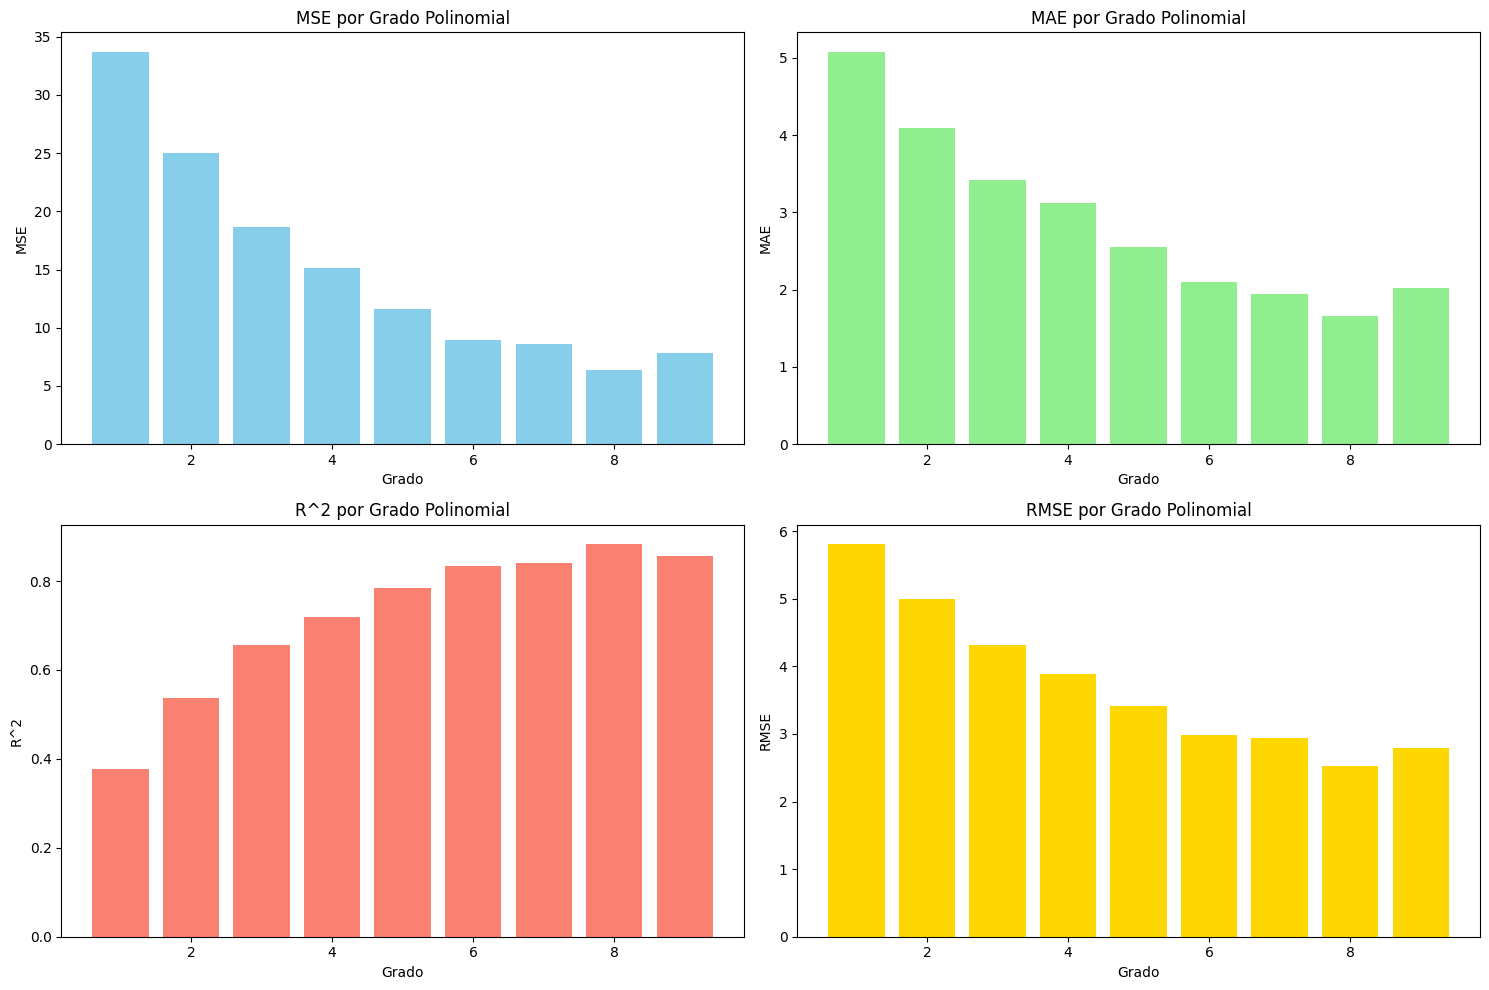

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Asumimos que df es tu DataFrame y ya está definido
X = df[['Weight', 'Volume']]
y = df['CO2']

# Diccionarios para almacenar las métricas
mse_scores = {}
mae_scores = {}
r2_scores = {}
rmse_scores = {}

# Probar grados del 1 al 9
for degree in range(1, 10):
    # Crear un modelo polinómico
    polynomial_features = PolynomialFeatures(degree=degree)
    linear_regression = linear_model.LinearRegression()
    pipeline = make_pipeline(polynomial_features, linear_regression)
    pipeline.fit(X, y)
    
    # Realizar predicciones
    y_pred = pipeline.predict(X)
    
    # Calcular métricas
    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    rmse = np.sqrt(mse)
    
    # Guardar métricas
    mse_scores[degree] = mse
    mae_scores[degree] = mae
    r2_scores[degree] = r2
    rmse_scores[degree] = rmse
    
    print(f"Grado {degree}: MSE={mse}, MAE={mae}, R^2={r2}, RMSE={rmse}")

# Convertir diccionarios a listas para la visualización
mse_values = list(mse_scores.values())
mae_values = list(mae_scores.values())
r2_values = list(r2_scores.values())
rmse_values = list(rmse_scores.values())

grados = np.arange(1, 10)  # Grados del 1 al 9

# Crear el diagrama de barras
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Ajustar los subplots
ax[0, 0].bar(grados, mse_values, color='skyblue')
ax[0, 0].set_title('MSE por Grado Polinomial')
ax[0, 0].set_xlabel('Grado')
ax[0, 0].set_ylabel('MSE')

ax[0, 1].bar(grados, mae_values, color='lightgreen')
ax[0, 1].set_title('MAE por Grado Polinomial')
ax[0, 1].set_xlabel('Grado')
ax[0, 1].set_ylabel('MAE')

ax[1, 0].bar(grados, r2_values, color='salmon')
ax[1, 0].set_title('R^2 por Grado Polinomial')
ax[1, 0].set_xlabel('Grado')
ax[1, 0].set_ylabel('R^2')

ax[1, 1].bar(grados, rmse_values, color='gold')
ax[1, 1].set_title('RMSE por Grado Polinomial')
ax[1, 1].set_xlabel('Grado')
ax[1, 1].set_ylabel('RMSE')

plt.tight_layout()
plt.show()

#### Ejemplo 
Con el mismo data set, se va a aplicar la tecnica de regularización y validación cruzada al tiempo usando la función GridSearchCV ( ver link https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
El objetivo es evaluar distintos polinomios, los difrentes hyper parametros de las regularización y aplica k fold dado la pequeña muestra de datos que se tiene

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Preprocesamiento con estandarización
scaler = StandardScaler()

# Modelo de regresión con regularización Ridge
ridge_regression = Ridge()

# Crear un pipeline que incluya la estandarización, la creación de características polinómicas y la regresión Ridge
pipeline = Pipeline([
    ('scaler', scaler),
    ('poly', PolynomialFeatures()),
    ('ridge', ridge_regression)
])

# Parámetros para GridSearchCV
param_grid = {
    'poly__degree': np.arange(1, 10),  # grados del 1 al 9
    'ridge__alpha': np.logspace(-4, 4, 10)  # diferentes valores de alpha para la regularización
}

# Inicializar GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=2, scoring='neg_mean_squared_error', verbose=1)

# Ajustar GridSearchCV con los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Mejores parámetros y mejor score
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor score (MSE):", -grid_search.best_score_)

# Evaluar en el conjunto de prueba
y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Test MSE: {mse}")
print(f"Test MAE: {mae}")
print(f"Test R^2: {r2}")
print(f"Test RMSE: {rmse}")


Fitting 2 folds for each of 90 candidates, totalling 180 fits
Mejores parámetros: {'poly__degree': 3, 'ridge__alpha': 166.81005372000558}
Mejor score (MSE): 35.428434964542106
Test MSE: 36.52317985597059
Test MAE: 4.662369636559721
Test R^2: 0.452323451081978
Test RMSE: 6.043441060850233


¿Por qué hay tanta diferencía entre el resultado anterior en que se obtuvo que el polinomio de grado 8 fue el mejor y este que nos indica que el polinomio de grado 3 es el mejor? Pista: Como se está calculando el MSE en el polinomio de grado 8?

### Ejercicio
realizar el mismo procedimiento anterior con regresión lasso y comparar resultados


## Ejercicio
Realiza todo el análisis que se ha hecho hasta el momento con el conjunto de datos Diamond Price Prediction en Python. Puedes encontrar el conjunto de datos en el siguiente enlace: https://www.kaggle.com/code/karnikakapoor/diamond-price-prediction/input. El objetivo es identificar las variables numéricas que componen el conjunto de datos. Se debe realizar dos análisis: uno utilizando todos las columnas numéricas y otro utilizando solo los dos que considere más importantes (puede examinar las distribuciones, la correlación para seleccionarlas). El objetivo es encontrar el mejor modelo que se ajuste a los datos. Para esto, se debe dividir los datos en tres grupos: entrenamiento (train), prueba (test) y validación (val). Una vez se haya probado una familia de modelos y se haya seleccionado el mejor para este caso a través del conjunto de validación, se debe volver a entrenar uniendo el conjunto de entrenamiento y validación, y realizar la prueba final con el conjunto de prueba.




In [8]:
df_diamonds = pd.read_csv('diamonds.csv')

In [9]:
df_diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [10]:
df_diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [12]:
df_diamonds.shape

(53940, 11)

In [13]:
df_diamonds.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [14]:
df_diamonds.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [15]:
df_diamonds.drop("Unnamed: 0", inplace=True,axis=1)

In [16]:
df_diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [17]:
# df_diamonds = df_diamonds[(df_diamonds["x"] != 0) | (df_diamonds["y"] != 0) | (df_diamonds["z"] != 0)]
df_diamonds = df_diamonds.drop(df_diamonds[df_diamonds["x"] == 0].index)
df_diamonds = df_diamonds.drop(df_diamonds[df_diamonds["y"] == 0].index)
df_diamonds = df_diamonds.drop(df_diamonds[df_diamonds["z"] == 0].index)

In [18]:
df_diamonds.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [19]:
import seaborn as sns

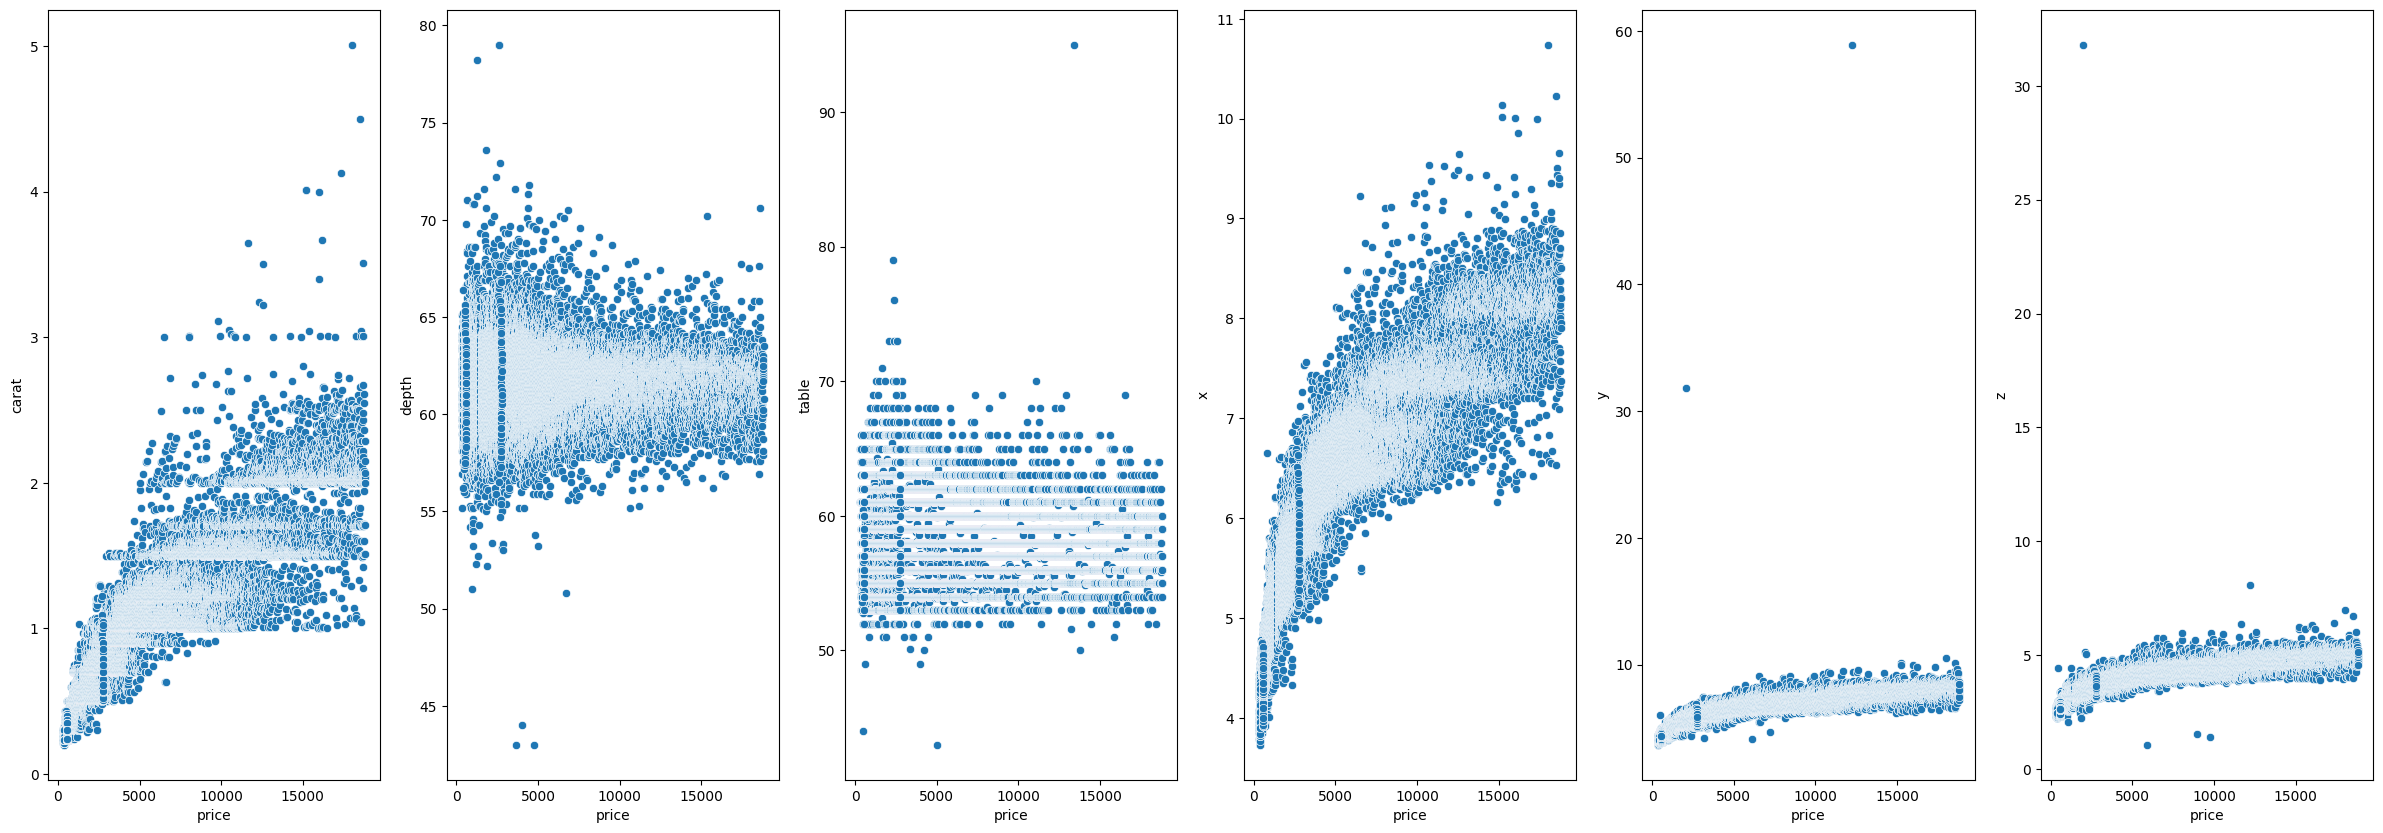

In [22]:
columnas = ['carat', 'depth', 'table', 'x', 'y', 'z']
c = 0
fig, axs = plt.subplots(ncols=len(columnas), figsize = (30,10))
for col in columnas:
    sns.scatterplot(data=df_diamonds, x = df_diamonds['price'], y = df_diamonds[col], ax = axs[c])
    c += 1


In [23]:
df_diamonds = df_diamonds[df_diamonds["carat"] <= 3]
df_diamonds = df_diamonds[(df_diamonds["depth"] <= 70) & (df_diamonds["depth"] >= 50)]
df_diamonds = df_diamonds[(df_diamonds["table"] < 80) & (df_diamonds["table"] >= 50)]
df_diamonds = df_diamonds[df_diamonds["x"] < 9]
df_diamonds = df_diamonds[df_diamonds["y"] < 10]
df_diamonds = df_diamonds[(df_diamonds["z"] < 7) & (df_diamonds["z"] > 3)]

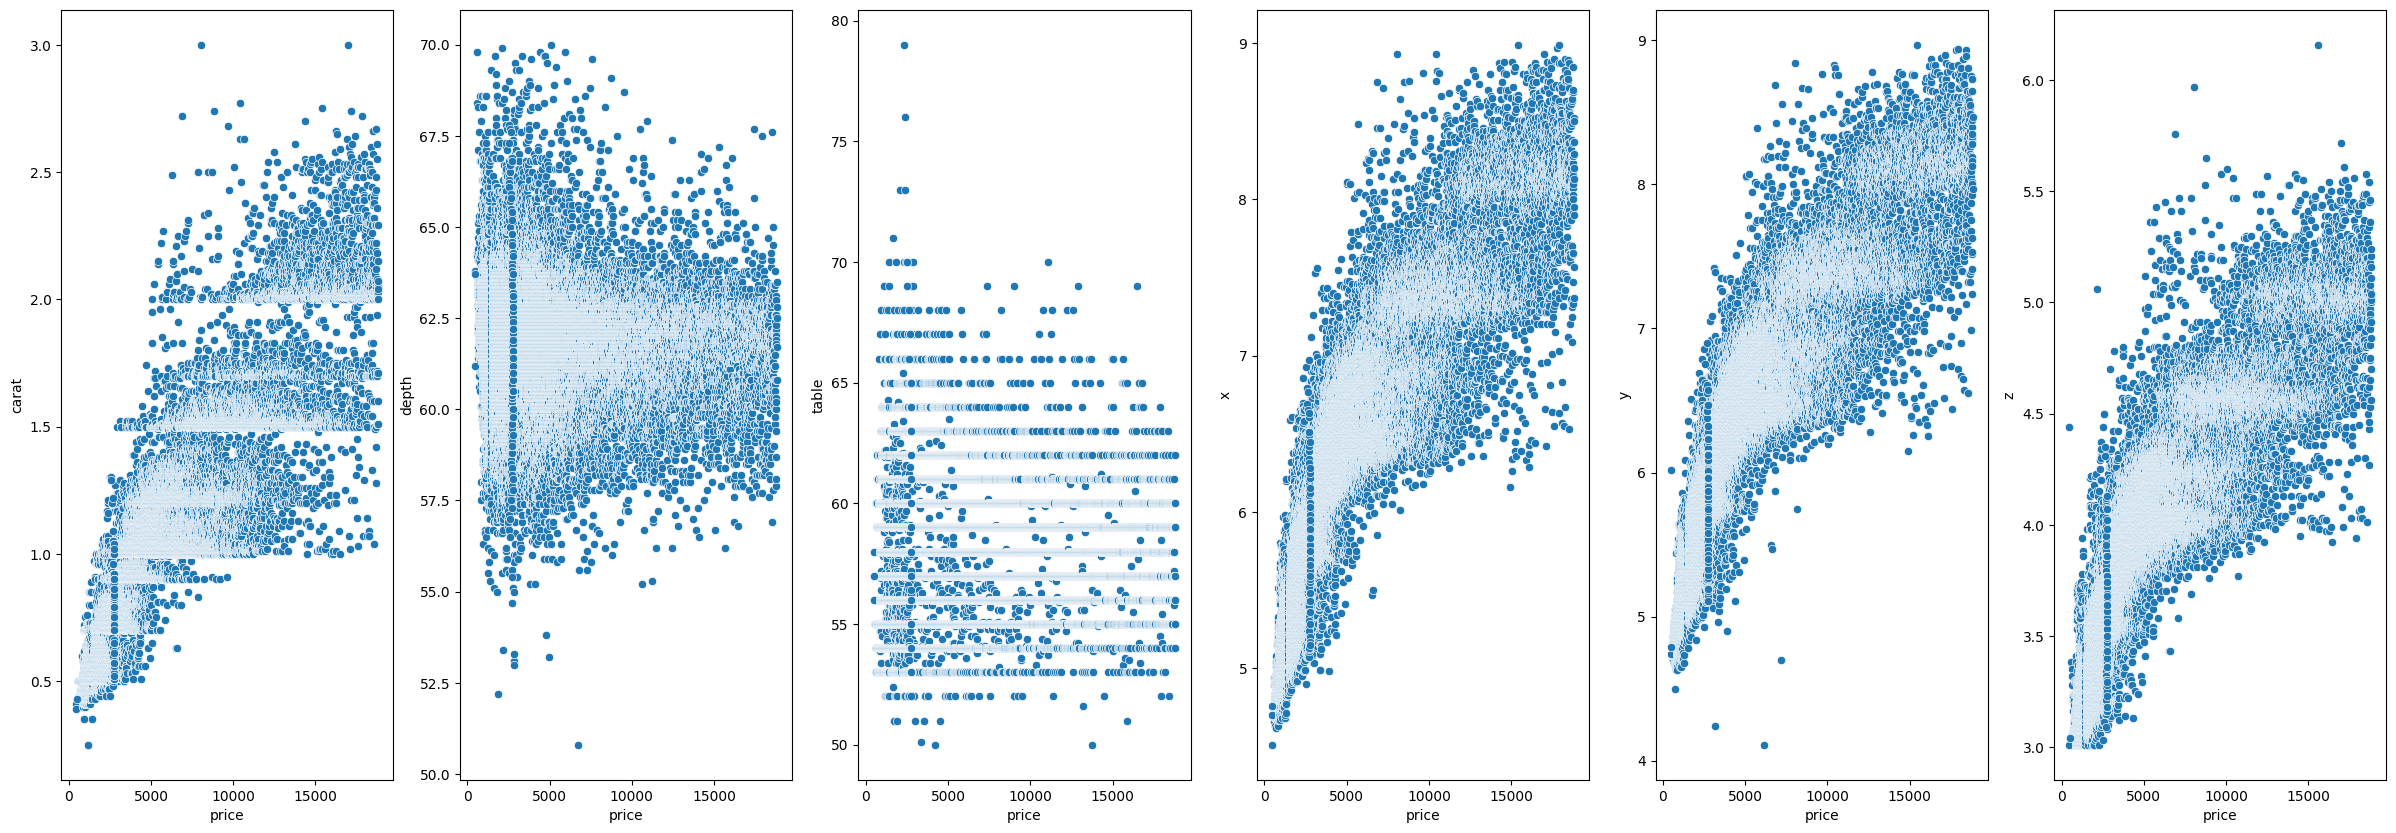

In [24]:
columnas = ['carat', 'depth', 'table', 'x', 'y', 'z']
c = 0
fig, axs = plt.subplots(ncols=len(columnas), figsize = (30,10))
for col in columnas:
    sns.scatterplot(data=df_diamonds, x = df_diamonds['price'], y = df_diamonds[col], ax = axs[c])
    c += 1

C:\Users\Usuario\AppData\Local\Temp\ipykernel_13548\2243189643.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_diamonds.corr(),annot=True)


<AxesSubplot: >

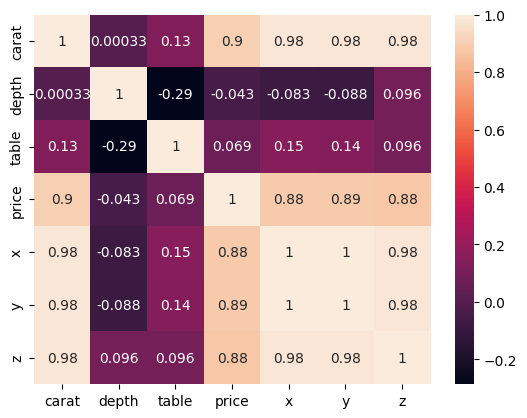

In [25]:
sns.heatmap(df_diamonds.corr(),annot=True)

In [29]:
df_diamonds["cut"].replace({
    "Ideal":5,
    "Fair": 1,
    "Very Good":3,
    "Good":2,
    "Premium":4
}, inplace=True)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_13548\2243189643.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_diamonds.corr(),annot=True)


<AxesSubplot: >

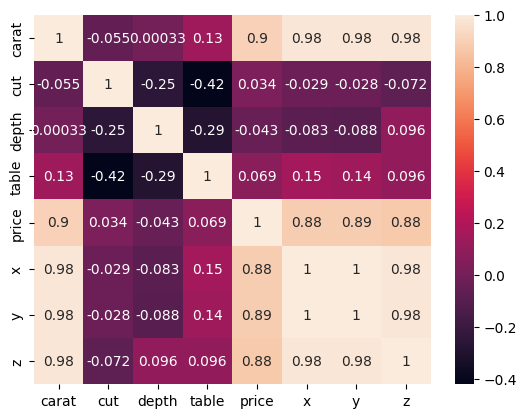

In [30]:
sns.heatmap(df_diamonds.corr(),annot=True)

In [32]:
df_diamonds["color"].replace({
    "E":1,
    "G":2,
    "F":3,
    "H":4,
    "D":5,
    "I":6,
    "J":7
},inplace=True)

In [33]:
df_diamonds['clarity'].unique()

array(['SI1', 'SI2', 'VS2', 'VS1', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [34]:
df_diamonds['clarity'].replace({
    'SI1': 1, 
    'SI2':2, 
    'VS2':3, 
    'VS1':4, 
    'VVS2':5, 
    'VVS1':6, 
    'I1':7,
    'IF':8
},inplace=True)

<AxesSubplot: >

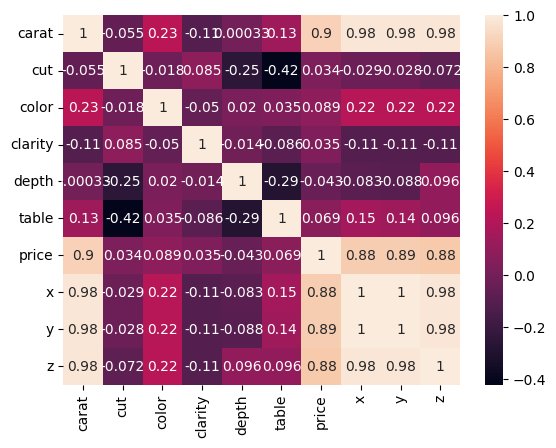

In [35]:
sns.heatmap(df_diamonds.corr(),annot=True)

In [36]:
X = df_diamonds.drop(["price"], axis=1)
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
90,0.70,5,1,1,62.5,57.0,5.70,5.72,3.57
91,0.86,1,1,2,55.1,69.0,6.45,6.33,3.52
92,0.70,5,2,3,61.6,56.0,5.70,5.67,3.50
93,0.71,3,1,3,62.4,57.0,5.68,5.73,3.56
94,0.78,3,2,2,63.8,56.0,5.81,5.85,3.72


In [37]:
y = df_diamonds['price']

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [40]:
LR = linear_model.LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [41]:
y_pred = LR.predict(X_test)    
mse = mean_squared_error(y_test, y_pred)
print("mse:",mse)
mae = mean_absolute_error(y_test, y_pred)
print("mae:",mae)
r2 = r2_score(y_test, y_pred)
print("r2:",r2)
rmse = np.sqrt(mse)
print("rmse:",rmse)

mse: 2468164.135004732
mae: 1028.6674476477679
r2: 0.8470788181428462
rmse: 1571.0391895190685


In [42]:
LR.score(X_test,y_test)

0.8470788181428462

<AxesSubplot: xlabel='price'>

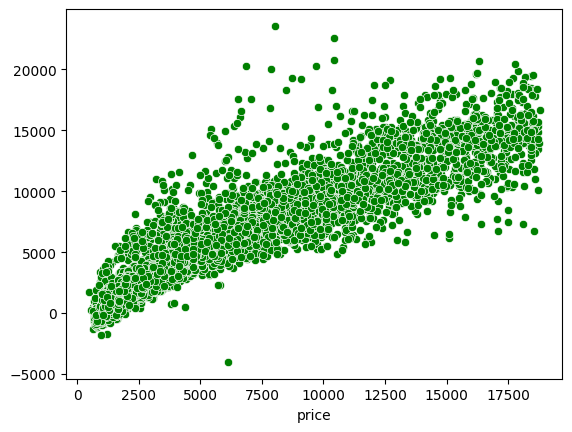

In [43]:
sns.scatterplot(x=y_test,y=y_pred,color="green")